In [2]:
from keras.datasets import cifar100
(x_train,_), (x_test,_) = cifar100.load_data()

169009152/169001437 [==============================] - 263s 2us/step


In [4]:
import cv2
import numpy as np

In [5]:
x_traing=[]
x_testg=[]
for i in range(50000):
   x_traing.append(cv2.cvtColor(x_train[i], cv2.COLOR_BGR2GRAY))
for i in range(10000):
   x_testg.append(cv2.cvtColor(x_test[i], cv2.COLOR_BGR2GRAY))

In [6]:
x_traing=np.array(x_traing)
x_testg=np.array(x_testg)
x_traing=x_traing.reshape(50000,32,32,1)
x_testg=x_testg.reshape(10000,32,32,1)

In [7]:
x_traing = x_traing/255.0
x_testg = x_testg/255.0

x_train = x_train/255.0
x_test = x_test/255.0

x_testg.shape


(10000, 32, 32, 1)

In [8]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(32,32,1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) 
x = MaxPooling2D((2, 2), padding='same')(x) 
x= Conv2D(64, (3, 3), activation='relu', padding='same')(x) 
x= Conv2D(64, (3, 3), activation='relu', padding='same')(x) 
x= MaxPooling2D((2, 2), padding='same')(x) # 8x8x128
encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(x)



x = UpSampling2D((2, 2))(encoded) 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x) 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x) 
x = UpSampling2D((2, 2))(x) 
x= Conv2D(64, (3, 3), activation='relu', padding='same')(x) 
decoded = Conv2D(3, (3, 3), activation='linear', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         73856     
__________

In [10]:
autoencoder.fit(x_traing,x_train,epochs=5,batch_size=256)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
50000/50000 [==============================] - 1586s 32ms/step - loss: 0.0237 - acc: 0.4786
Epoch 2/5
50000/50000 [==============================] - 1015s 20ms/step - loss: 0.0129 - acc: 0.4882
Epoch 3/5
50000/50000 [==============================] - 1082s 22ms/step - loss: 0.0118 - acc: 0.4901
Epoch 4/5
50000/50000 [==============================] - 7628s 153ms/step - loss: 0.0115 - acc: 0.4951
Epoch 5/5
50000/50000 [==============================] - 1025s 21ms/step - loss: 0.0108 - acc: 0.4972


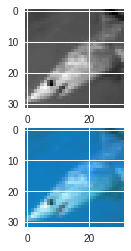

In [54]:
 import matplotlib.pyplot as plt #test image in black and white
%matplotlib inline
t_imgg=x_traing[50]
t_imgg = t_imgg.reshape(32,32)

plt.subplot(2,1,1)
plt.imshow(t_imgg,cmap='gray')

t_colorimg = x_train[50]
t_colorimg = t_colorimg.reshape(32,32,3)
plt.subplot(2,1,2)
plt.imshow(t_colorimg)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


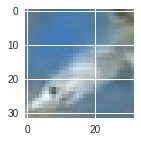

In [55]:
t_imgg = t_imgg.reshape(1,32,32,1)
result = autoencoder.predict(t_imgg)
result = result[0]
# result
plt.figure(figsize=(2,2))
plt.imshow(result)